In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

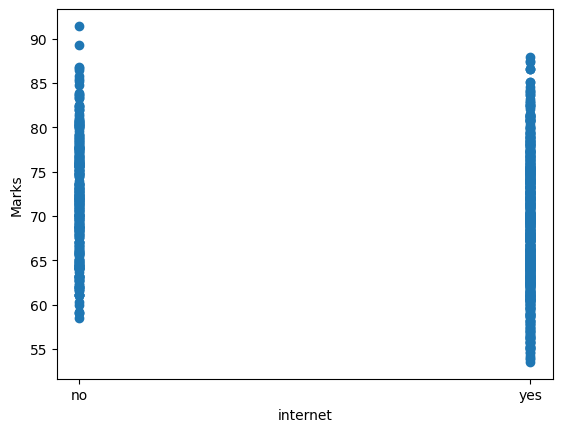

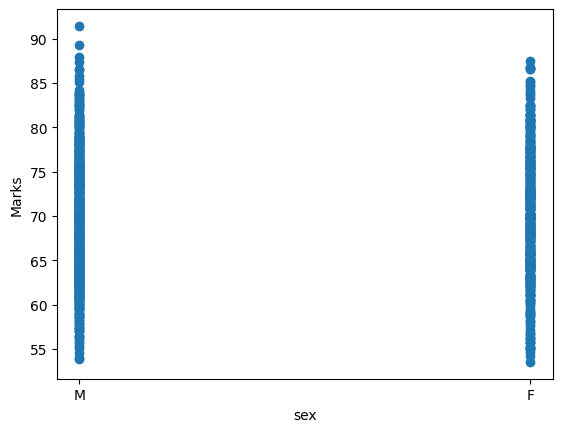

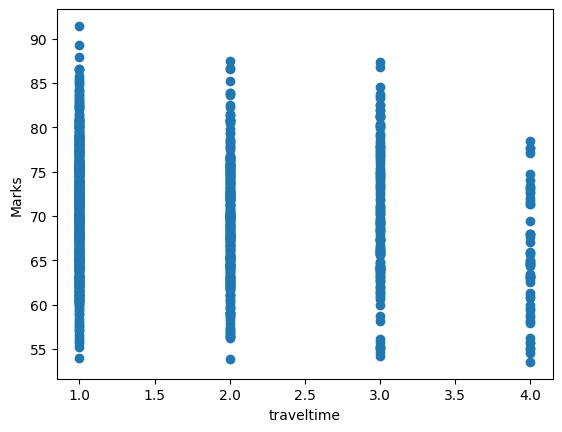

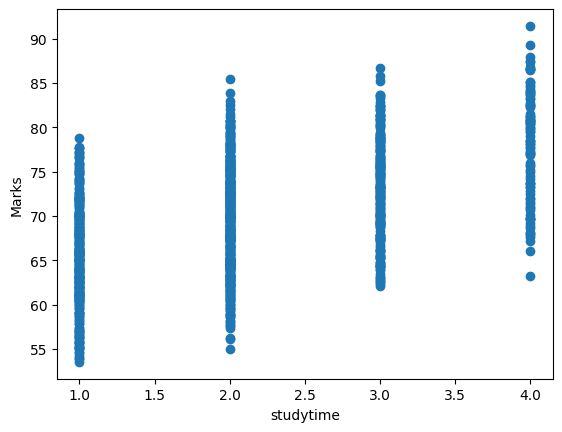

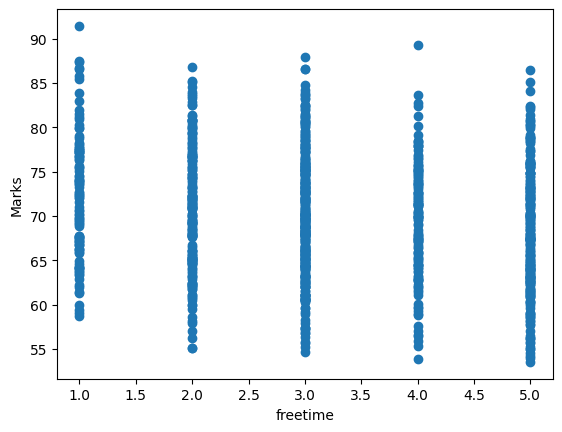

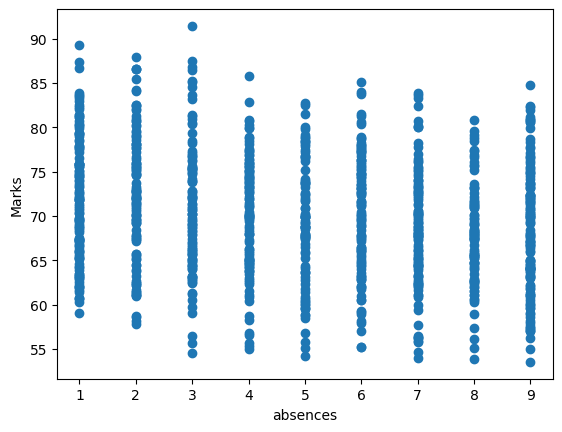

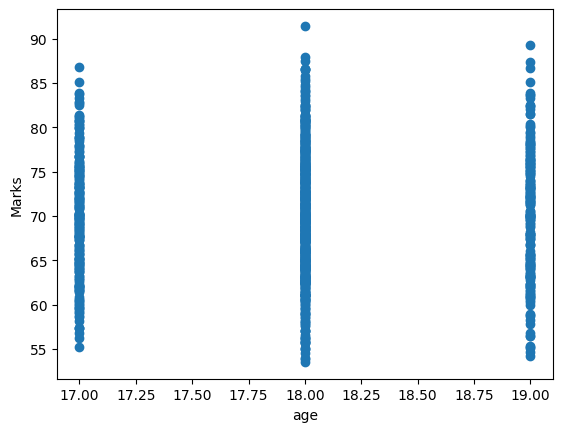

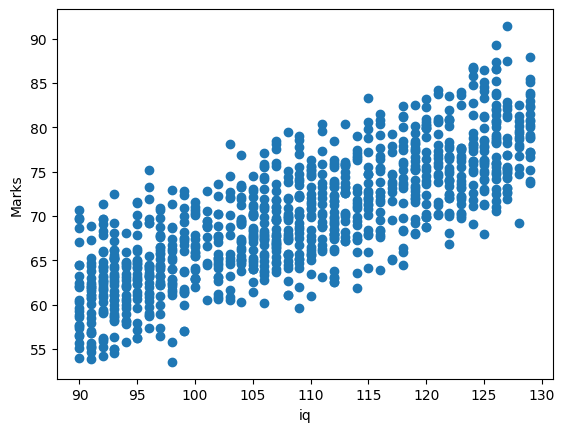

In [93]:
from re import X
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

for i in range(x_train.shape[1]):
  plt.figure()
  plt.scatter(x_train[:,i],y_train)
  plt.xlabel(data.columns[i])
  plt.ylabel('Marks')
  plt.show()
# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    # Your code here
  # ---------
  for i in range(len(x_train)):
    if x_train[i][0] == 'yes':
      x_train[i][0] = 1
    else:
      x_train[i][0] = 0

    if x_train[i][1] == 'M':
      x_train[i][1] = 1
    else:
      x_train[i][1] = 0

  return x_train

x_train = feature_changing(x_train)

In [94]:
x_train

array([[0, 1, 2, ..., 6, 18, 118],
       [1, 1, 2, ..., 7, 19, 107],
       [1, 1, 3, ..., 5, 18, 108],
       ...,
       [1, 1, 2, ..., 5, 17, 123],
       [1, 0, 1, ..., 8, 17, 104],
       [1, 1, 1, ..., 6, 18, 128]], dtype=object)

In [95]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
  x_mean = np.mean(x_train, axis=0)
  x_std = np.std(x_train, axis=0)
  x_train = (x_train - x_mean) / x_std



  return x_train,x_std,x_mean

In [96]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
  y_pred = np.dot(x_train,w) + b
  loss = np.mean((y_pred - y_train)**2)

  return loss

In [97]:
def gradient_descent(x_train,y_train,w,b):
  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------
  lr = 0.00001
  y_pred = np.dot(x_train,w) + b
  dw = np.dot(x_train.T,(y_pred - y_train))
  db = np.mean(y_pred - y_train)
  w = w - lr*dw
  b = b - lr*db

  return w,b

In [98]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b
y_predict = y_predict + 0.5

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
